In [123]:
# Step 1: Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from IPython.display import display

In [124]:
# Step 2: Load the dataset
data = pd.read_csv("weatherAUS.csv")

print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
display(data.describe())
print("\nFirst few rows of the dataset:")
display(data.head())

# Remove rows where the target variable is NaN
data = data.dropna(subset=["RainTomorrow"])

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000



First few rows of the dataset:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [125]:
# Step 3: Data Processor class
class DataProcessor:
    def __init__(self, data):
        self.data = data
        self.initial_features = data.columns.tolist()
        self.dropped_features = []

    def clean_data(self):
        # Remove features with a large number of missing values
        self.data.dropna(thresh=len(self.data) * 0.7, axis=1, inplace=True)

    def handle_datetime(self):
        # Convert 'Date' to datetime and create 'Year' and 'Month' columns
        self.data["Date"] = pd.to_datetime(self.data["Date"])
        self.data["Year"] = self.data["Date"].dt.year
        self.data["Month"] = self.data["Date"].dt.month

    def split_data(self):
        # Split the data into training and test sets
        max_year = self.data["Year"].max()
        train_data = self.data[self.data["Year"] < max_year]
        test_data = self.data[self.data["Year"] == max_year]
        return train_data, test_data

In [126]:
# Step 4: Create the data processor instance and process the data
processor = DataProcessor(data)
processor.clean_data()
processor.handle_datetime()
train_data, test_data = processor.split_data()

In [127]:
# Automatically identify numeric and categorical features
numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_data.select_dtypes(include=[object]).columns.tolist()
categorical_features.remove("RainTomorrow")  # Exclude the target variable

In [128]:
# Step 5: Preprocessing numeric features
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

# Apply transformations to numeric features
X_train_num = numeric_transformer.fit_transform(train_data[numeric_features])
X_test_num = numeric_transformer.transform(test_data[numeric_features])

# Convert back to DataFrame for easy concatenation
X_train_num = pd.DataFrame(X_train_num, columns=numeric_features)
X_test_num = pd.DataFrame(X_test_num, columns=numeric_features)

In [129]:
# Step 6: Preprocessing categorical features
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(drop="if_binary", sparse_output=False)),
    ]
)

# Apply transformations to categorical features
X_train_cat = categorical_transformer.fit_transform(train_data[categorical_features])
X_test_cat = categorical_transformer.transform(test_data[categorical_features])

# Convert back to DataFrame for easy concatenation
X_train_cat = pd.DataFrame(
    X_train_cat,
    columns=categorical_transformer.named_steps["onehot"].get_feature_names_out(
        categorical_features
    ),
)
X_test_cat = pd.DataFrame(
    X_test_cat,
    columns=categorical_transformer.named_steps["onehot"].get_feature_names_out(
        categorical_features
    ),
)

In [130]:
# Step 7: Concatenate numeric and categorical features
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

Y_test = test_data["RainTomorrow"]
Y_train = train_data["RainTomorrow"]

In [131]:
# Step 8: Define the model
model = LogisticRegression(solver="liblinear")

In [132]:
# Step 9: Train the model
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

              precision    recall  f1-score   support

          No       0.87      0.95      0.91      6703
         Yes       0.72      0.45      0.55      1763

    accuracy                           0.85      8466
   macro avg       0.79      0.70      0.73      8466
weighted avg       0.84      0.85      0.83      8466



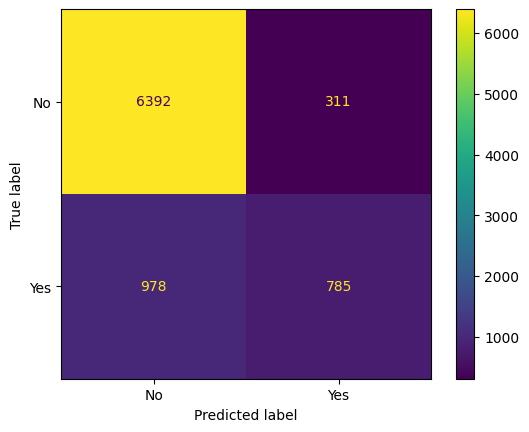

In [133]:
# Step 10: Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

# Step 11: Conclusion

The model achieved an overall accuracy of 85%. The precision for predicting 'Yes' (rain) is 72%, indicating that 72% of the predicted rainy days were correct. However, the recall for 'Yes' is only 45%, meaning the model missed predicting rain for 55% of the actual rainy days. The precision for 'No' (no rain) is 87%, with a high recall of 95%, showing the model is very effective at correctly predicting non-rainy days. Overall, the model performs well but could improve in predicting rainy days accurately.